# Normalization Example

__Objective__: Practice using Numpy to normalize a toy dataset with a homogeneous transformation matrix.

## PART 1: Generate Raw Data

__To do__: Run this cell to generate today's toy dataset.

First few rows:
[[0.   5.32 1.  ]
 [1.   4.8  1.  ]
 [2.   5.73 1.  ]
 [3.   7.18 1.  ]
 [4.   7.4  1.  ]]

Column-wise mean: [9.5  9.18 1.  ]


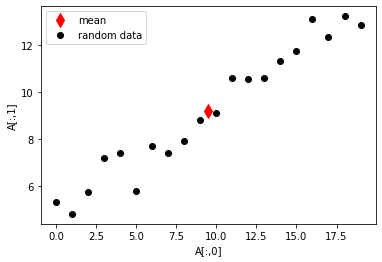

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

# So that randomized results are consistent across trials
np.random.seed(0)

# A noisy version of the line y = 0.5x + 4
n = 20
c0 = np.arange( n ).reshape( (n,1) )
c1 = c0*0.5 + 4 + np.random.normal( 0, 0.75, (n,1) )
ones = np.ones( (n,1) )
A = np.hstack( (c0, c1, ones) )

# Print some stats
A_mean = np.mean( A, axis=0 )
print("First few rows:")
print(A[0:5,:])
print( "\nColumn-wise mean:", A_mean )
plt.plot( A_mean[0], A_mean[1], "dr", markersize = 10, label="mean")

# Visualize the dataset
plt.plot( A[:,0], A[:,1], "ok", label="random data")
plt.xlabel( "A[:,0]" )
plt.ylabel( "A[:,1]" )
plt.legend()
plt.show()

## PART 2: Normalize!


We've got a pretty evenly distributed dataset, so let's normalize by range. 

Here's the description of an iterative solution, assuming we already know the min and max values in each column (`min_j` and `max_j`) :
> `for each value A[i,j] in feature j :`
>> `A_norm[i,j] = ( A[i,j] - min_j ) / ( max_j - min_j )` 

Let's see if we can __vectorize__ this solution by designing an appropriate __transformation matrix__ below...

### 2.1: Stats

__To do__: Find the min, max, and range of each column.

*Hint: Make sure the min, max, and range vectors are the right shape: (1,3).*

In [4]:
mins = np.min(A, axis=0).reshape( (1,A.shape[1]) )
maxs = np.max(A, axis=0).reshape( (1,A.shape[1]) )
ranges = ( maxs - mins ).reshape( (1,A.shape[1]) )
means = np.mean(A, axis=0).reshape( (1,A.shape[1]) )
stds = np.std(A, axis=0).reshape( (1,A.shape[1]) )

print( "mins:  ", mins )
print( "maxs:  ", maxs )
print( "ranges:", ranges )
print( "means:", means )
print( "standard deviations:", stds )

mins:   [[0.  4.8 1. ]]
maxs:   [[19.   13.23  1.  ]]
ranges: [[19.    8.43  0.  ]]
means: [[9.5  9.18 1.  ]]
standard deviations: [[5.77 2.69 0.  ]]


### 2.2 Transformation Matrix

__To do__: Design a transformation matrix that can perform the **normalization by range**.

Remember that normalization needs to translate (subtract the min) *before* scaling (dividing by the range).

In [5]:
# Translation: subtract the min
T = np.eye( 3 )
T[0:-1,-1] = -mins[0,0:-1]              
print("\nTranslation matrix:")
print( T )

# Scale: divide by the range (or, equivalently, multiply by the reciprocal)
S = np.eye( 3 )
S[0:-1,0:-1] = S[0:-1,0:-1] * (1/ranges[0,0:-1])
print("\nScale matrix:")
print( S )

# Normalization requires a compound transformation matrix that translates THEN scales
N = S @ T
print("\nNormalization matrix:")
print( N )


Translation matrix:
[[ 1.   0.  -0. ]
 [ 0.   1.  -4.8]
 [ 0.   0.   1. ]]

Scale matrix:
[[0.05 0.   0.  ]
 [0.   0.12 0.  ]
 [0.   0.   1.  ]]

Normalization matrix:
[[ 0.05  0.    0.  ]
 [ 0.    0.12 -0.57]
 [ 0.    0.    1.  ]]


### 2.3 Transform!

__To do__: 
1. Apply the transformation to normalize the raw dataset. 
2. Visualize the normalized dataset.


Transformed dataset:
[[0.   0.06 1.  ]
 [0.05 0.   1.  ]
 [0.11 0.11 1.  ]
 [0.16 0.28 1.  ]
 [0.21 0.31 1.  ]
 [0.26 0.11 1.  ]
 [0.32 0.35 1.  ]
 [0.37 0.31 1.  ]
 [0.42 0.37 1.  ]
 [0.47 0.48 1.  ]
 [0.53 0.51 1.  ]
 [0.58 0.69 1.  ]
 [0.63 0.68 1.  ]
 [0.68 0.69 1.  ]
 [0.74 0.77 1.  ]
 [0.79 0.82 1.  ]
 [0.84 0.99 1.  ]
 [0.89 0.89 1.  ]
 [0.95 1.   1.  ]
 [1.   0.96 1.  ]]

Normalized means: [0.5  0.52 1.  ]


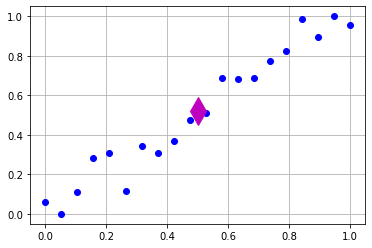

In [6]:
# Normalize the dataset using the homogeneous transformation matrix you've designed
A_norm = (N @ A.T).T

# What does the normalized data look like?
print("\nTransformed dataset:")
print(A_norm)

# What does the normalized mean look like?
norm_means = A_norm.mean( axis=0 )
print("\nNormalized means:", norm_means)

# Visualize it!
plt.plot( A_norm[:,0], A_norm[:,1], 'ob' )
plt.plot( norm_means[0], norm_means[1], 'dm', markersize=20 )
plt.grid()
plt.show()

## PART 3: Compare

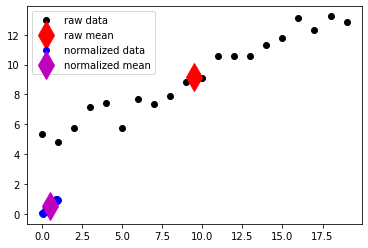

In [7]:
# Superimpose the normalized dataset
plt.plot( A[:,0], A[:,1], 'ok', label="raw data" )
plt.plot( A_mean[0], A_mean[1], 'dr', markersize=20, label="raw mean" )
plt.plot( A_norm[:,0], A_norm[:,1], 'ob', label="normalized data" )
plt.plot( norm_means[0], norm_means[1], 'dm', markersize=20, label="normalized mean" )
plt.legend()
plt.grid
plt.show()

## Part 4: Normalization by Z-Score


Translation matrix:
[[ 1.    0.   -9.5 ]
 [ 0.    1.   -9.18]
 [ 0.    0.    1.  ]]

Scale matrix:
[[0.17 0.   0.  ]
 [0.   0.37 0.  ]
 [0.   0.   1.  ]]

Normalization matrix:
[[ 0.17  0.   -1.65]
 [ 0.    0.37 -3.41]
 [ 0.    0.    1.  ]]

Transformed dataset:
[[-1.65 -1.43  1.  ]
 [-1.47 -1.63  1.  ]
 [-1.3  -1.28  1.  ]
 [-1.13 -0.74  1.  ]
 [-0.95 -0.66  1.  ]
 [-0.78 -1.27  1.  ]
 [-0.61 -0.54  1.  ]
 [-0.43 -0.67  1.  ]
 [-0.26 -0.47  1.  ]
 [-0.09 -0.14  1.  ]
 [ 0.09 -0.03  1.  ]
 [ 0.26  0.53  1.  ]
 [ 0.43  0.52  1.  ]
 [ 0.61  0.53  1.  ]
 [ 0.78  0.8   1.  ]
 [ 0.95  0.96  1.  ]
 [ 1.13  1.47  1.  ]
 [ 1.3   1.18  1.  ]
 [ 1.47  1.51  1.  ]
 [ 1.65  1.37  1.  ]]

Normalized means: [-0. -0.  1.]


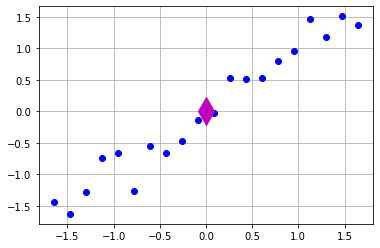

In [8]:
# DESIGN THE TRANSFORMATION MATRIX 

# Translation: subtract the mean
T = np.eye( 3 )
T[0:-1,-1] = -means[0,0:-1]              
print("\nTranslation matrix:")
print( T )

# Scale: divide by the standard deviation
S = np.eye( 3 )
S[0:-1,0:-1] = S[0:-1,0:-1] * (1/stds[0,0:-1])
print("\nScale matrix:")
print( S )

# Normalization requires a compound transformation matrix that translates THEN scales
N = S @ T
print("\nNormalization matrix:")
print( N )


# APPLY THE TRANSFORMATION

# Normalize the dataset using the homogeneous transformation matrix you've designed
A_norm = (N @ A.T).T

# What does the normalized data look like?
print("\nTransformed dataset:")
print(A_norm)

# What does the normalized mean look like?
norm_means = A_norm.mean( axis=0 )
print("\nNormalized means:", norm_means)

# Visualize it!
plt.plot( A_norm[:,0], A_norm[:,1], 'ob' )
plt.plot( norm_means[0], norm_means[1], 'dm', markersize=20 )
plt.grid()
plt.show()